# Discussion Session 1: Linear Regression - Welcome
                                      

In this discussion session you will be using the boston housing data set to tune hyperparameters and to predict the price of a house with a certain number of features. This discussion session complements the homework. In the homework you coded the cost and gradient functions. In this session you will learn how to use them.  This data has 
* crim - per capita crime rate by town.

* zn - proportion of residential land zoned for lots over 25,000 sq.ft.

* indus - proportion of non-retail business acres per town.

* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox - nitrogen oxides concentration (parts per 10 million).

* rm - average number of rooms per dwelling.

* age - proportion of owner-occupied units built prior to 1940.

* dis - weighted mean of distances to five Boston employment centres.

* rad - index of accessibility to radial highways.

* tax - full-value property-tax rate per $10,000.

* ptratio - pupil-teacher ratio by town.

* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat - lower status of the population (percent).

* medv median value of owner-occupied homes in $1000s.



## Part 1 - Data Processing 

Use `size` to figure out the dimensions once you load in the data. This data set consists of 506 rows by 14 columns. The 14th column is the price. 
- load in the data 
- create a `features` variable 
- create a `price` variable 
- Plot the `price` vs `rm` (postive slope negative? ) 6th column
- Plot the `price` vs `lstat` (positive slope, negative?) 
- Add the titles and the labels 


In [9]:
% Data processing below 
filename = 'housing.txt';
data = load(filename);
price = data(:,14);
features = data(:,1:13);

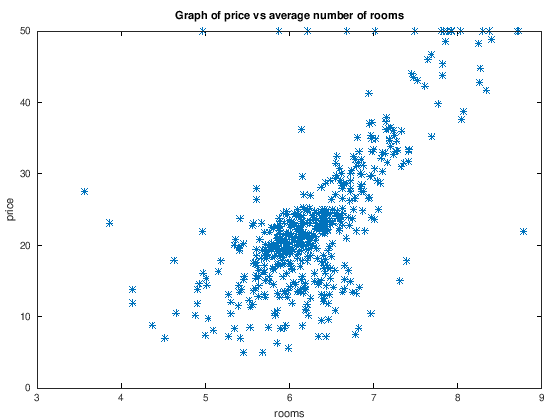

In [10]:
plot(features(:,6), price, '*')
title('Graph of price vs average number of rooms')
xlabel('rooms')
ylabel('price')

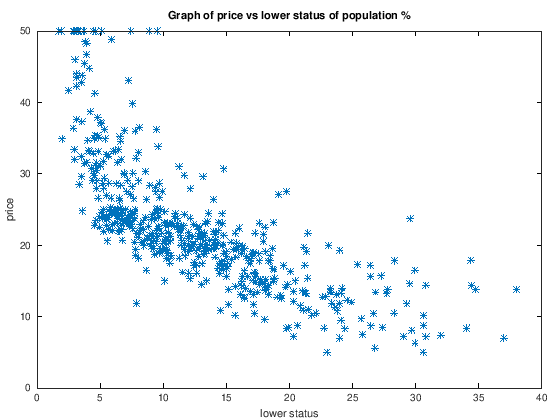

In [11]:
plot(features(:,13), price, '*'); % 6 and 13 
title('Graph of price vs lower status of population %')
xlabel('lower status')
ylabel('price')

## Compute the cost and the gradient

Remember there were two critical functions you built for homework. `computeCost` function and `gradientDescent`.
The first function to compute the cost used the following formula:

$$J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^{T}(X\theta-\vec{y})\tag{1}$$

The second function (for gradient descent): 

$$\theta_j := 
\theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \;\;\;\;\;\mbox{(simultaneously update $\theta_j$ for all $j$)}\tag{2} $$

You could compute the gradient first:

$$\frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}\tag{3}$$
and then update theta.

We implemented these functions for you. `computeCostMulti(X, y, theta)` and `gradientDescentMulti(X, y, theta, alpha, num_iters)`. 

In [43]:
function J = computeCostMulti(X, y, theta)
    m = length(y); % number of training examples
    J = 1./(2*m) * (X*theta - y)'*(X*theta - y);
end

In [44]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
m = length(y);                    % number of training examples
J_history = zeros(num_iters, 1);  % vector to store the cost at every iteration
    for iter = 1:num_iters
    grad = 1./m * X'*(X*theta - y);
    theta = theta - alpha .* grad; 
    J_history(iter) = computeCostMulti(X, y, theta); % Save the cost J in every iteration    
    end

end

## Fit the line in each plot ! 

Now that you have your compute cost and gradient descent, it is time for you to fit the line to the two plots you plotted above. Remember to add the bias (a column of ones to each data point). Below you will be fitting two lines. 

- Price and rooms 
- Price and lower precentile 
- We have given you the code for the plot, just get the right theta and make sure your model is well tuned.

Room is the sixth column of the variable features. Don't forget to add the bias.


In [7]:
% add the bias and get the variable rooms


In [21]:
% fit a model to predict the price given the rooms.


ans =  29.265


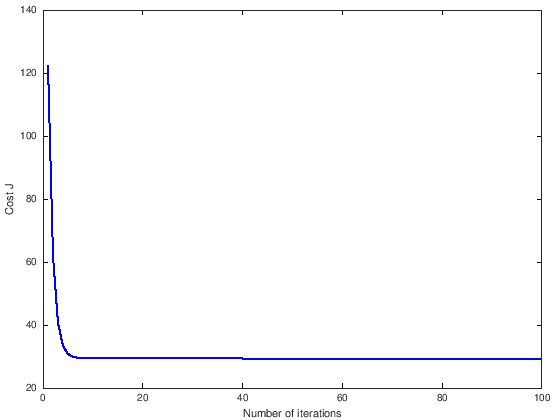

In [22]:
% plot the cost verus the number of iterations
computeCostMulti(rooms, price, theta_rooms)
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 4);
xlabel('Number of iterations');
ylabel('Cost J');

In [23]:
theta_rooms

theta_rooms =

   0.13913
   3.62984



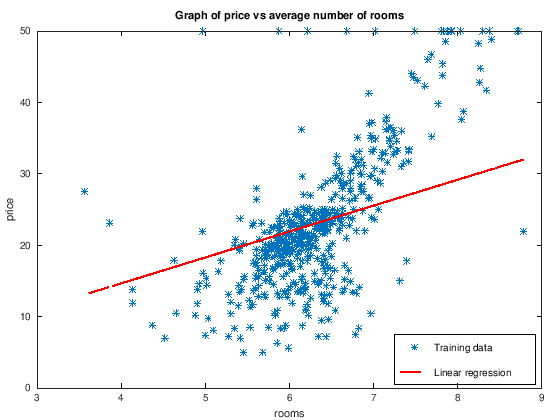

In [24]:
% plot price vs rooms with the fit, you should fit the red line well.
plot(rooms(:,2),price, '*')
hold on; % keep previous plot visible
plot(rooms(:,2), rooms*theta_rooms, '-.r','LineWidth', 4)
legend('Training data', 'Linear regression','Location','southeast')
title('Graph of price vs average number of rooms')
xlabel('rooms')
ylabel('price')

In [12]:
% Predict the cost of a house with 6 rooms!! 


cost =  19.942


Now do the same thing for lstat. lstat is the 13th feature. Predict the price of a house with an lstat of 12.7

In [25]:
% Add the bias, lstat is the 13th feature
lstat =


In [38]:
# Now fit lstat on the price (play with alpha and num_iters until you get a good model)


theta =

   1.6858
   1.0233



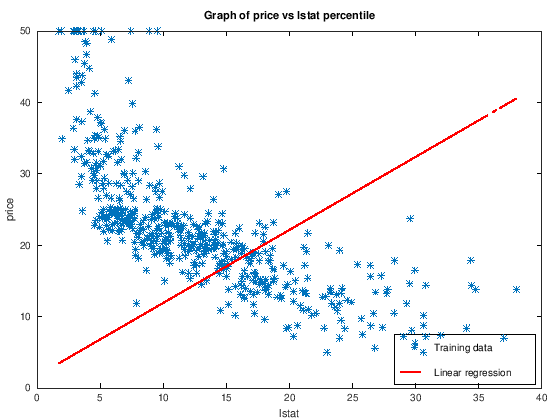

In [39]:
% plot it, we did it for you! Just make sure your variable names are the same as ours and that the red line fits well.
plot(lstat(:,2),price, '*')
hold on; % keep previous plot visible
plot(lstat(:,2), lstat*theta, '-.r','LineWidth', 4)
legend('Training data', 'Linear regression','Location','southeast')
title('Graph of price vs lstat percentile')
xlabel('lstat')
ylabel('price')

In [16]:
% predict the price of a house with its lstat being 12.7 (does that look right)?
lstat_price = 


lstat_price =  22.421
theta =

   34.27214
   -0.93314



## Model with two variables -  'rm' and 'lstat'

Implementation of the model with two variables. Fit a model with two variables (`rm` and `lstat`). Then predict the price of a house with 6 rooms and an lstat of 12.7. What can you say about this model compared to the other two models?

In [17]:
%% 12.7 lstat and 6 rooms

